<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
## openEO Platform
#### Big Data From Space 2023
Exploring Corine Land Cover

### Connect to openEO Platform using python

In [1]:
import openeo

In [2]:
conn = openeo.connect("openeo.cloud")

In [3]:
conn = conn.authenticate_oidc()

Authenticated using refresh token.


### Look at the collection description

In [4]:
conn.describe_collection("corine_land_cover")

{'cube:dimensions': {'bands': {'type': 'bands', 'values': ['CLC']},
  't': {'extent': [['2000-12-15T00:00:00', '2018-12-15T00:00:00']],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [1400000.0, 7900000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [100000.0, 4500000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'description': 'The CORINE Land Cover (CLC) inventory began in 1985, consisting of 44 land cover classes. This collection is resampled and stored at a 10m x 10m resolution. For further information on CORINE land cover see [here](https://land.copernicus.eu/pan-european/corine-land-cover)',
 'extent': {'spatial': {'bbox': [[-32.091997820189285,
     31.6977150076753,
     55.116146716432254,
     72.11413813793037]]},
  'temporal': {'interval': [['2000-12-15T00:00:00Z',
     '2018-12-15T00:00:00Z']]}},
 'id': 'corine_land_cover',
 'item_assets': {},
 'keywords': ['EODC', 'Copernicus', 'ARD', 'Level-3'],
 'license': 'proprietary',
 'links': [{'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
   'rel': 'root'},
  {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections',
   'rel': 'parent'},
  {'href': 'https://openeocloud.vito.be/openeo/1.0.0/collections/corine_land_cover',
   'rel': 'self'}],
 'properties': {},
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.0.0/schema.json',
  'https://stac-extensions.github.io/item-assets/v1.0.0/schema.json',
  'https://github.com/stac-extensions/eo'],
 'stac_version': '1.0.0',
 'summaries': {'constellation': {},
  'eo:bands': [{'common_name': 'band_1', 'name': 'CLC'}],
  'federation:backends': ['eodc'],
  'odc:file_format': {'0': 'GeoTIFF'},
  'odc:product_family': {'0': 'level2'},
  'platform': {}},
 'title': 'CORINE Land Cover',
 'type': 'Collection'}

### The Corine Land Cover classes and their associated numbers
#### Pick a number for a class of interest
This is not the full list but just to give an example

 | Number | Class  | | Number  | Class   | | Number  | Class   |
 |---|---|---|---|---|---|---|---|
 |  2  | Discontinuous urban fabric  | | 9 | Construction sites | | 32 |Sparsely vegetated areas  |
 |  3  | Industrial or commercial units  | | 10 | Green urban areas | | 33 | Burnt areas |
 |  4  | Road and rail networks and associated land  | | 11 | Sport and leisure facilities | | 34 | Glaciers and perpetual snow |


### Start creating an openEO process graph
#### Pick a spatial extent of interest

In [5]:
spatial_extent = {"west": 12.1783447265625,
                  "south": 46.9061837801476,
                  "east": 13.50151062011719,
                  "north": 47.093500502407764}

#### Load the corine land cover collection

In [6]:
data = conn.load_collection('corine_land_cover', spatial_extent = spatial_extent, temporal_extent = ["2000-01-01","2020-06-30"])

#### If you are interested in a specific class, pick the number of the class and set the data equal to it.

In [7]:
data_34 = data == 34

#### Save the result as a netCDF

In [8]:
saved_data = data_34.save_result(format="NetCDF")
saved_data.flat_graph()

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'id': 'corine_land_cover',
   'spatial_extent': {'west': 12.1783447265625,
    'south': 46.9061837801476,
    'east': 13.50151062011719,
    'north': 47.093500502407764},
   'temporal_extent': ['2000-01-01', '2020-06-30']}},
 'apply1': {'process_id': 'apply',
  'arguments': {'data': {'from_node': 'loadcollection1'},
   'process': {'process_graph': {'eq1': {'process_id': 'eq',
      'arguments': {'x': {'from_parameter': 'x'}, 'y': 34},
      'result': True}}}}},
 'saveresult1': {'process_id': 'save_result',
  'arguments': {'data': {'from_node': 'apply1'},
   'format': 'NetCDF',
   'options': {}},
  'result': True}}

#### Create and start a job

In [30]:
job = saved_data.create_job()
job.start_job()

<BatchJob job_id='eodc-e6cc1b7f-4216-47fe-8c59-53df7af25b4a'>

In [35]:
job

<BatchJob job_id='eodc-e6cc1b7f-4216-47fe-8c59-53df7af25b4a'>

#### Once the job status says 'finished', results can be downloaded.

In [17]:
results = job.get_results()
metadata = results.get_metadata()
results.download_files("./glaciers/")

[PosixPath('glaciers/EU010M_E049N015T1_20001215T000000.nc'),
 PosixPath('glaciers/EU010M_E049N015T1_20061215T000000.nc'),
 PosixPath('glaciers/EU010M_E049N015T1_20121215T000000.nc'),
 PosixPath('glaciers/EU010M_E049N015T1_20181215T000000.nc'),
 PosixPath('glaciers/EU010M_E050N015T1_20001215T000000.nc'),
 PosixPath('glaciers/EU010M_E050N015T1_20061215T000000.nc'),
 PosixPath('glaciers/EU010M_E050N015T1_20121215T000000.nc'),
 PosixPath('glaciers/EU010M_E050N015T1_20181215T000000.nc'),
 PosixPath('glaciers/job-results.json')]

In [14]:
data_2000 = data_34.filter_temporal(extent=["2000-01-01", "2000-12-31"]).drop_dimension(name="t")
data_2018 = data_34.filter_temporal(extent=["2018-01-01", "2018-12-31"]).drop_dimension(name="t")
difference = data_2000 - data_2018
saved_diff = difference.save_result(format="NetCDF")

In [16]:
saved_diff.flat_graph()

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'id': 'corine_land_cover',
   'spatial_extent': {'west': 12.1783447265625,
    'south': 46.9061837801476,
    'east': 13.50151062011719,
    'north': 47.093500502407764},
   'temporal_extent': ['2000-01-01', '2020-06-30']}},
 'apply1': {'process_id': 'apply',
  'arguments': {'data': {'from_node': 'loadcollection1'},
   'process': {'process_graph': {'eq1': {'process_id': 'eq',
      'arguments': {'x': {'from_parameter': 'x'}, 'y': 34},
      'result': True}}}}},
 'filtertemporal1': {'process_id': 'filter_temporal',
  'arguments': {'data': {'from_node': 'apply1'},
   'extent': ['2000-01-01', '2000-12-31']}},
 'dropdimension1': {'process_id': 'drop_dimension',
  'arguments': {'data': {'from_node': 'filtertemporal1'}, 'name': 't'}},
 'filtertemporal2': {'process_id': 'filter_temporal',
  'arguments': {'data': {'from_node': 'apply1'},
   'extent': ['2018-01-01', '2018-12-31']}},
 'dropdimension2': {'process_id': 'drop_dim

In [17]:
job = saved_diff.create_job()
job.start_job()

<BatchJob job_id='eodc-75cc016d-4ee7-4e90-afb6-9b68ee6aaf35'>

In [18]:
job

<BatchJob job_id='eodc-75cc016d-4ee7-4e90-afb6-9b68ee6aaf35'>

In [20]:
results = job.get_results()
metadata = results.get_metadata()
results.download_files("./glaciers/")

[PosixPath('glaciers/EU010M_E049N015T1_NO_TIME.nc'),
 PosixPath('glaciers/EU010M_E050N015T1_NO_TIME.nc'),
 PosixPath('glaciers/job-results.json')]

### Looking at the results using python matplotlib

In [4]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

path = "./glaciers/"

data_2000 = xr.open_mfdataset([path + file for file in os.listdir(path) if "2000" in file])
data_2018 = xr.open_mfdataset([path + file for file in os.listdir(path) if "2018" in file])
diff = xr.open_mfdataset([path + file for file in os.listdir(path) if "NO_TIME" in file])

corine_2000 = data_2000.B01.values
corine_2018 = data_2018.B01.values
diff = diff.to_array().values[0]
print("Glaciers and perpetual snow in 2000: ", np.sum(corine_2000))
print("Glaciers and perpetual snow in 2018: ", np.sum(corine_2018))

Glaciers and perpetual snow in 2000:  1796440.0
Glaciers and perpetual snow in 2018:  1060202.0


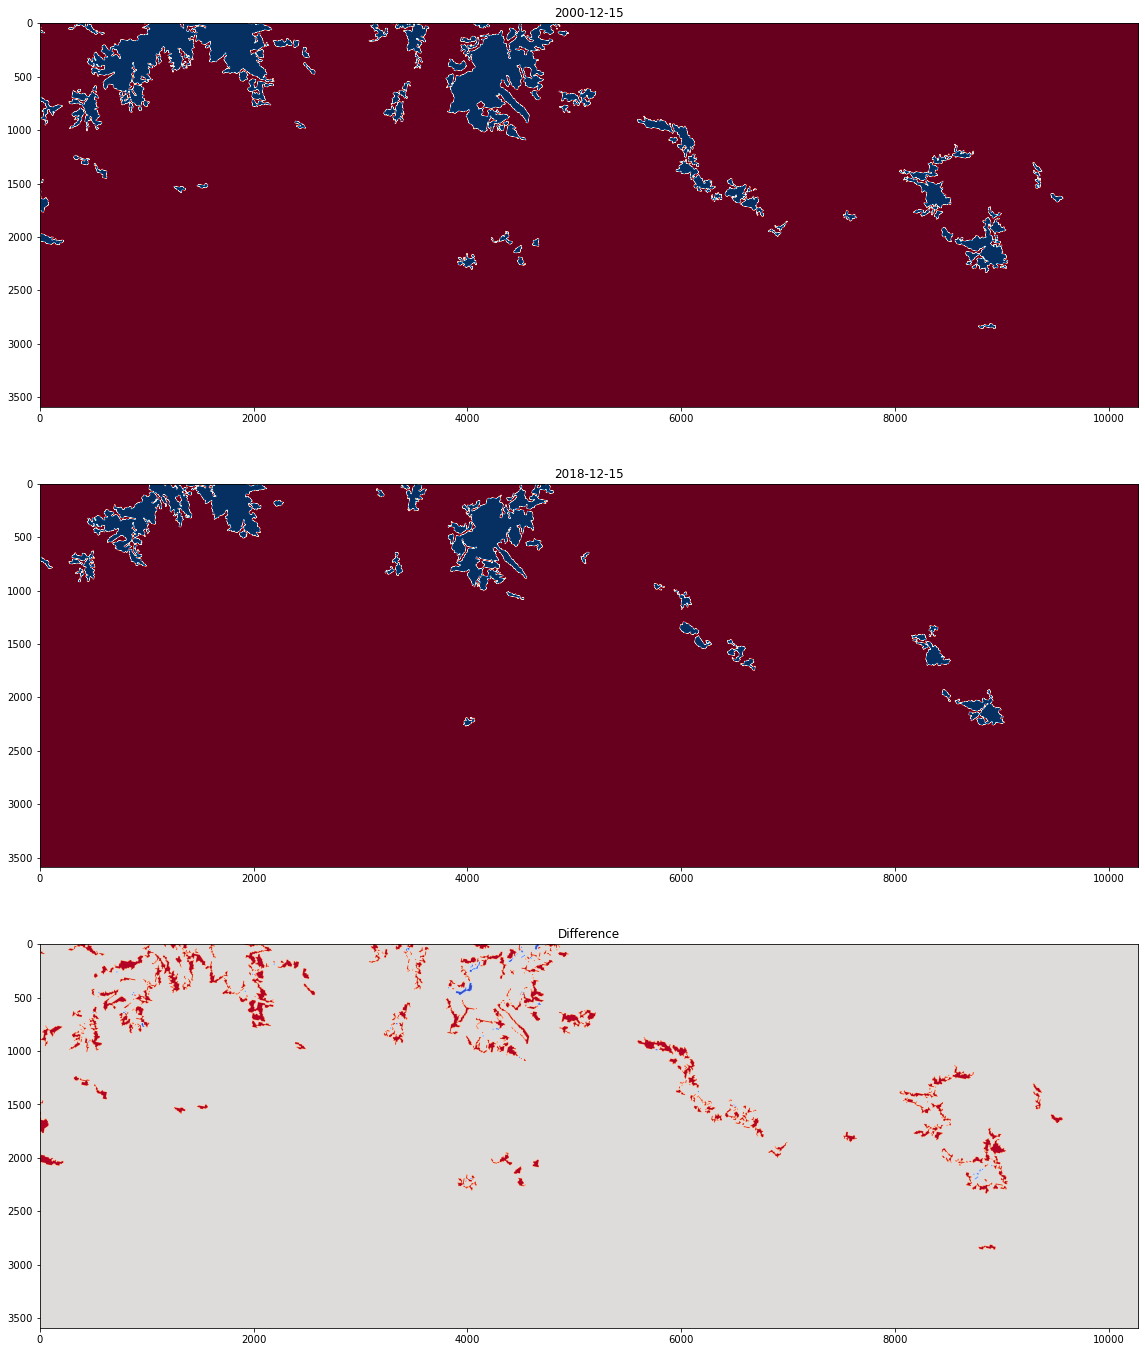

In [5]:
plt.figure(figsize=(24,24))

plt.subplot(3,1,1)
plt.title("2000-12-15")
plt.imshow(corine_2000, cmap = "RdBu")

plt.subplot(3,1,2)
plt.title("2018-12-15")
plt.imshow(corine_2018, cmap = "RdBu")

plt.subplot(3,1,3)
plt.title("Difference")
plt.imshow(diff, cmap = "coolwarm")